In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_csv('data.csv',sep=',')

In [3]:
data["ym"]=data['years'].map(str)+"/"+data['months'].map(str)

In [4]:
#dataframe索引
data[['years',"num"]].head()

,years,num
0,2018,259.083067
1,2018,251.190574
2,2018,48.809699
3,2018,55.056724
4,2018,375.881869


In [5]:
#data["num"]为Series，而data["num"].values为array类型，可以用来生成Series
data1=pd.Series(data["num"].values, index=pd.date_range('2018-11-01', freq='D',periods=len(data["num"])))

In [10]:
data1

2018-11-01    259.083067
2018-11-02    251.190574
2018-11-03     48.809699
2018-11-04     55.056724
2018-11-05    375.881869
                 ...    
2021-06-19     36.819274
2021-06-20     30.298410
2021-06-21    827.342462
2021-06-22    812.539115
2021-06-23    366.884028
Freq: D, Length: 966, dtype: float64

In [11]:
data2=pd.DataFrame(data[["num","smoothnum"]].values,columns=['num','snum'], index=pd.date_range('2018-11-01', freq='D',periods=len(data["num"])))

In [12]:
data2.head()

,num,snum
2018-11-01,259.083067,238.392207
2018-11-02,251.190574,232.981330
2018-11-03,48.809699,48.809699
2018-11-04,55.056724,35.056724
2018-11-05,375.881869,336.181869


In [13]:
data2.to_csv('data1.csv')

<AxesSubplot:>

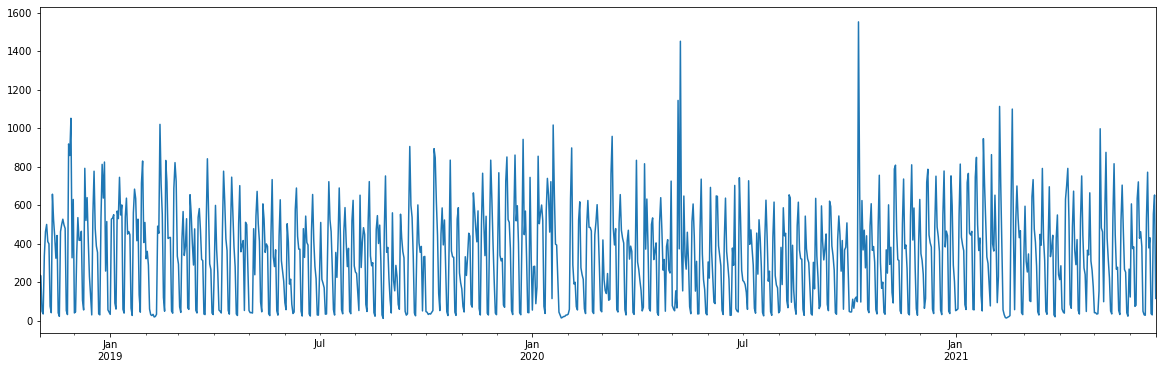

In [14]:
data2['snum'].plot(figsize=(20,6))

In [29]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data2["snum"].value); axes[0, 0].set_title('Original Series')
plot_acf(data2["snum"].value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data2["snum"].value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data2["snum"].value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data2["snum"].value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

AttributeError: 'Series' object has no attribute 'value'

In [18]:
model = ARIMA(data2["snum"].values, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  965
Mode

In [11]:
data2_period = data2.to_period('M') #按月显示，但不统计
print(type(data2_period))
print(type(data2_period.index))
# 请注意df.index的数据类型是DatetimeIndex；
# df_peirod的数据类型是PeriodIndex
print(data2_period)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.period.PeriodIndex'>
               snum
2018-11  238.392207
2018-11  232.981330
2018-11   48.809699
2018-11   35.056724
2018-11  336.181869
...             ...
2021-06   36.819274
2021-06   30.298410
2021-06  554.667809
2021-06  652.961204
2021-06  115.601543

[966 rows x 1 columns]
